In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import scipy.optimize as opt
from scipy.optimize import curve_fit
import spinmob as s
# import os 
# os.chdir('C:\\Users\\joeyb\\Documents\\Physics 359\\Hall')

In [2]:
mv = (np.loadtxt('all_the_mv.csv', delimiter=',', skiprows = 1))

In [20]:
result = []
for sublist in mv:
    for item in sublist:
        result.append(item)
#print("\nCollapse nested lists:")
final_result = np.transpose(result)
# print(final_result)

TempArray = np.linspace(-270, 399, 670)

### Temp vs Voltage

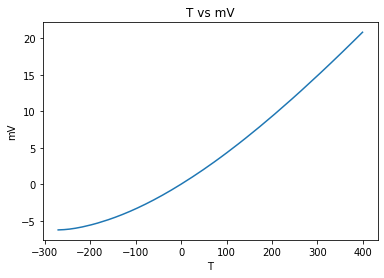

In [21]:
plt.plot(TempArray, final_result)
plt.title("T vs mV")
plt.xlabel('T')
plt.ylabel('mV')
plt.show()

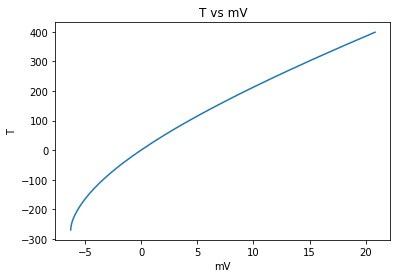

In [22]:
plt.plot(final_result, TempArray)
plt.title("T vs mV")
plt.xlabel('mV')
plt.ylabel('T')
plt.show()

### Trying with just taking linear approx on small scales

In [23]:
def linear(V, m, b):
    return m*V + b

"""
Takes input voltage (mV) and outputs corresponding temperature (C)
Must be run with mVArraysOf10[] and fits[]
"""
def getTempFromVolt(V):
    fitted = False
    index = 0

    while fitted == False:
    #     print(min(mVArraysOf10[index]), (max(mVArraysOf10[index])) )
        if (min(mVArraysOf10[index]) <= V <= (max(mVArraysOf10[index])) ):
            TempVal = linear(V, fits[index][0][0], fits[index][0][1])
            fitted = True
        index+=1
        if index == len(fits):
            print("Error, Voltage not found.")
            TempVal = -1000
            break
    
    return TempVal
    

In [29]:
#splitting arrays in to 10 element arrays
mVArraysOf10 = np.split(final_result, len(final_result)/10)
TArraysOf10 = np.split(TempArray, len(final_result)/10)

#get linear fit for each array of 10
fits = []

for i in range(0, int(len(final_result)/10)):
#     print(TimeArray[i])
    fits.append(curve_fit(linear, mVArraysOf10[i], TArraysOf10[i]))

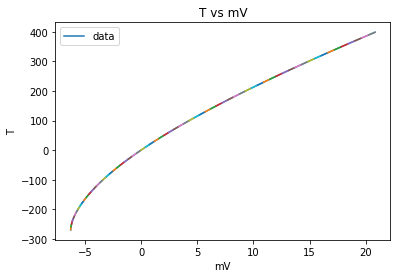

In [32]:
#plotting fits to make sure they match the data

plt.plot(final_result, TempArray, label="data")
plt.title("T vs mV")
plt.xlabel('mV')
plt.ylabel('T')
plt.legend()

for i in range(0, len(fits)):
    plt.plot(mVArraysOf10[i], linear(mVArraysOf10[i], fits[i][0][0], fits[i][0][1]))

plt.show()

In [33]:
# Use function to get temp for a given V
V = 0
Temp = getTempFromVolt(V)
            
print(Temp)

0.0037477819111435854
